<a href="https://colab.research.google.com/github/Tchouanga12/violenceDetection/blob/master/ExtractFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
d=[]
while(1):
  d.append('1')

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import h5py
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Conv3D,MaxPooling3D,Dropout,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


Extract frames

In [0]:
!ls 'gdrive/My Drive'


In [0]:
#so we basically need to get the videos in a loop for each video we resize to 112 * 112 * 3 then after we stack them vertically and add to an array
def generate(size,dre,labels):
  videos_list = np.zeros(shape=(size,16,112,112,3)) #first videos this will be the full data for training
  # train_videos_label = np.ones(shape=(1050,1)) # for each video stack we need to write the labels either 0 or 1 == we are using one for all since all videos are violent

  #we can make use this syntax

  #(x, y) = img.shape
  #for x1, x2 in np.ndindex((x, y)):
    #  data[(x1, x2)] = img[x1, x2]

  main_count = 0
  print(dre)

  for i in os.listdir(dre):
    if i.endswith('mp4'):
      print('we are in no {} file'.format(main_count))

      video = os.path.join(dre, i)
      # print(video)

      stack = np.zeros(shape=(16,112,112,3)) # we save every frame so we understand what we are doing
      vidcap = cv2.VideoCapture(video)
      count = 0

      while True:
          if(count > 15):
            break
            
          vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*180))     
          success,image = vidcap.read()

          if image is not None:
              image = cv2.resize(image,(112,112))
              image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
              image = image/255
    
              # plt.imshow(image)
              # plt.show()
              
              # print(image.shape,success)
              stack[count] = image

          # cv2.imwrite(F'/content/gdrive/My Drive/Dataset/convert/teek%d.jpg' % count, image)
          # print('this is no {} of no {} file'.format(count,main_count))
          count += 1

    #save to the main dataset
    # print('end')
    videos_list[main_count] = stack
    main_count += 1

  return (videos_list,labels)

# vid,label = generate(1050,'/content/gdrive/My Drive/raw/train/violent/',np.ones((1050,1)))
# np.save('/content/train_violence_videos',vid)
# np.save('/content/train_violence_labels',label)

In [3]:
data_dir = '/content/gdrive/My Drive/raw/'
traindir = data_dir + 'train/'
traindirViolence = traindir + 'violent/'
traindirNonviolence = traindir + 'non_violent/'
testdir = data_dir + 'test/'
testdirViolence = testdir + 'violent/'
testdirNonviolence = testdir + 'non_violent/'

print(traindirViolence)

!ls '/content/gdrive/My Drive/raw/test/non_violent/'| wc -l

/content/gdrive/My Drive/raw/train/violent/
10


In [0]:
first = np.array([[[1,2,3],[3,8,0],[1,5,6]]])
second = np.array([[[1,2,3],[3,8,0],[2,5,6]]])

fall = np.append(first,second,axis=0)
fall[0] = np.array([2,5,7])
print(fall/20)

# **Frame Extraction**

In [0]:
#  for i in os.listdir(traindirViolence):
#      if i.endswith('mp4'):
#              video = os.path.join(path, i)
#              print(video)
#              vidcap = cv2.VideoCapture(video)
#              vidcap.set(cv2.cv.CV_CAP_PROP_FPS, 5) #for the frame per sec
#              success,image = vidcap.read()
#              count = 0
#              while success:
#                  cv2.imshow('frame%d.jpg' % count, image)     # save frame as JPEG file      
#                  success,image = vidcap.read()
#                  print('Read a new frame: ', success)
#                  count += 1

In [0]:
#so we basically need to get the videos in a loop for each video we resize to 112 * 112 * 3 then after we stack them vertically and add to an array
def generate(size,dre,labels):
  videos_list = np.zeros(shape=(size,16,112,112)) #first videos this will be the full data for training
  train_videos_label = np.ones(shape=(1050,1)) # for each video stack we need to write the labels either 0 or 1 == we are using one for all since all videos are violent

  #we can make use this syntax

  #(x, y) = img.shape
  #for x1, x2 in np.ndindex((x, y)):
    #  data[(x1, x2)] = img[x1, x2]

  main_count = 0
  print(dre)

  for i in os.listdir(dre):
    if i.endswith('mp4'):
      print('we are in no {} file'.format(main_count))

      video = os.path.join(dre, i)
      # print(video)

      stack = np.zeros(shape=(16,112,112)) # we save every frame so we understand what we are doing
      vidcap = cv2.VideoCapture(video)
      count = 0

      while True:
          if(count > 15):
            break
            
          vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*180))     
          success,image = vidcap.read()

          if image is not None:
              image = cv2.resize(image,(112,112))
              image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
              image = image/255
              

              # plt.imshow(image)
              # plt.show()
              
              # print(image.shape,success)
              stack[count] = image

          # cv2.imwrite(F'/content/gdrive/My Drive/Dataset/convert/teek%d.jpg' % count, image)
          # print('this is no {} of no {} file'.format(count,main_count))
          count += 1

    #save to the main dataset
    # print('end')
    videos_list[main_count] = stack
    main_count += 1

  return (videos_list,labels)

In [4]:
def videoNumber(directory):
  count = 0
  for i in os.listdir(directory):
    count += 1

  return count

videoNumber(traindirNonviolence)

1035

In [7]:
vid,label = generate(1035,traindirNonviolence,np.zeros((1035,1)))
np.save(F'/content/gdrive/My Drive/raw/train_non_violence_videos',vid)
np.save(F'/content/gdrive/My Drive/raw/train_non_violence_labels',label)

vid,label = generate(videoNumber(traindirViolence),traindirViolence,np.ones((videoNumber(traindirViolence),1)))
np.save(F'/content/gdrive/My Drive/raw/train_violence_videos',vid)
np.save(F'/content/gdrive/My Drive/raw/train_violence_labels',label)

vid,label = generate(10,testdirViolence,np.ones((10,1),dtype = int))
np.save(F'/content/gdrive/My Drive/raw/test_violence_videos',vid)
np.save(F'/content/gdrive/My Drive/raw/test_violence_labels',label)

vid,label = generate(10,testdirNonviolence,np.zeros((10,1),dtype = int))
np.save(F'/content/gdrive/My Drive/raw/test_non_violence_videos',vid)
np.save(F'/content/gdrive/My Drive/raw/test_non_violence_labels',label)



np.save('/content/til',[2,3])

/content/gdrive/My Drive/raw/train/non_violent/
we are in no 0 file
we are in no 1 file
we are in no 2 file
we are in no 3 file
we are in no 4 file
we are in no 5 file
we are in no 6 file
we are in no 7 file
we are in no 8 file
we are in no 9 file
we are in no 10 file
we are in no 11 file
we are in no 12 file
we are in no 13 file
we are in no 14 file
we are in no 15 file
we are in no 16 file
we are in no 17 file
we are in no 18 file
we are in no 19 file
we are in no 20 file
we are in no 21 file
we are in no 22 file
we are in no 23 file
we are in no 24 file
we are in no 25 file
we are in no 26 file
we are in no 27 file
we are in no 28 file
we are in no 29 file
we are in no 30 file
we are in no 31 file
we are in no 32 file
we are in no 33 file
we are in no 34 file
we are in no 35 file
we are in no 36 file
we are in no 37 file
we are in no 38 file
we are in no 39 file
we are in no 40 file
we are in no 41 file
we are in no 42 file
we are in no 43 file
we are in no 44 file
we are in no 45 f

In [0]:
print(vid[0,0,0])

In [0]:
np.save(F'/content/gdrive/My Drive/Dataset/sgnigeria/train_violence_videos',train_videos_list)
np.save(F'/content/gdrive/My Drive/Dataset/sgnigeria/train_violence_labels',train_videos_label)

In [0]:
stacker = np.ones(shape=(16,112,112,3),dtype = int) # we save every frame so we understand what we are doing
print(stacker.dtype)
vidcap = cv2.VideoCapture(testdirViolence +'/3.mp4')
count = 0

while True:
    if(count > 15):
      break
      
    vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*200))     
    success,image = vidcap.read()

    plt.imshow(image)
    plt.show()

    if image is not None:
        image = np.array(cv2.resize(image,(112,112)))
        print(image.shape,success)
        stacker[count] = image

    # cv2.imwrite(F'/content/gdrive/My Drive/Dataset/convert/teek%d.jpg' % count, image)
    print('this is no {} of no {} file'.format(count,0))
    count += 1


In [0]:
plt.imshow(stacker[8])
plt.show()

In [0]:
print(stacker[7])

**Load Dataset**

In [0]:
directory = '/content/gdrive/My Drive/raw'
test_nv_stack = directory + '/test_non_violence_videos.npy'
test_nv_label = directory + '/test_non_violence_labels.npy'
test_vio_stack = directory + '/test_violence_videos.npy'
test_vio_label = directory + '/test_violence_labels.npy'
train_nv_stack = directory + '/train_non_violence_videos.npy'
train_nv_label = directory + '/train_non_violence_labels.npy'
train_vio_stack = directory + '/train_violence_videos.npy'
train_vio_label = directory + '/train_violence_labels.npy'

In [0]:
data_x = np.load(test_nv_stack)
label_y = np.load(test_vio_label)



In [0]:
data_x = np.append(data_x,np.load(test_vio_stack),axis=0)
label_y = np.append(label_y,np.load(test_vio_label),axis=0)

In [0]:
data_x = np.append(data_x,np.load(train_nv_stack),axis=0)
label_y = np.append(label_y,np.load(train_nv_label),axis=0)


In [0]:
data_x = np.append(data_x,np.load(train_vio_stack),axis=0)
label_y = np.append(label_y,np.load(train_vio_label),axis=0)

# print(label_y)

In [0]:
# data_x =np.array([1])
# label_y =np.array([1])
print(data_x.shape)
print(label_y.shape)



NameError: ignored

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data_x,label_y,test_size=0.2)

(1684, 16, 112, 112, 3)
[1.]


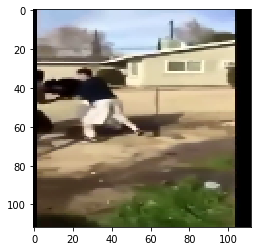

In [0]:
print(x_train.shape)
print(y_train[1])
plt.imshow(x_train[1,1])
plt.show()

 **Model Design**

![alt text](https://drive.google.com/uc?id=1Gvneb8PqsSvAhXXD2wvzRpNKkgP5GEdh)

 **Initialize Hyper-parameters**

In [0]:
epochs    = 100
batch_size    = 30
learning_rate = 0.003    # SGD --> 0.003 ADAM --> 0.001

**Define Model**

In [0]:
def method1():
  
  model = keras.Sequential([
        Conv3D(64, (3, 3, 3), padding='same',activation='relu',kernel_initializer='he_uniform',input_shape = (16,112,112,3)),
        MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)),

        Conv3D(128, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),

        Conv3D(256, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        Conv3D(256, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),

        Conv3D(512, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        Conv3D(512, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),

        Conv3D(512, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        Conv3D(512, kernel_size=(3, 3, 3),kernel_initializer='he_uniform', padding='same'),
        MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),
        
        Flatten(),
        Dense(4096,kernel_initializer='he_uniform'),
        Dense(4096,kernel_initializer='he_uniform'),
        Dense(1,activation='sigmoid')
  ])

  #Loss should be added
  model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
  model.summary()

  return model

 **Train Model**

In [0]:
#keras handles testing and printing the accuracy

train_model = method1()
mc = keras.callbacks.ModelCheckpoint(F'/content/gdrive/My Drive/raw/Saved_Weights/weights.{epochs:02d}.hdf5',save_weights_only=True)
train_model.fit(x_train,y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(x_test,y_test),callbacks=[mc])
train_model.save('/content/gdrive/My Drive/raw/saved_model/model.h5')
train_model.save('/content/gdrive/My Drive/raw/finalmodel.h5')


# Plot history: Categorical crossentropy & Accuracy
plt.plot(train_model.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(train_model.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(train_model.history['accuracy'], label='Accuracy (training data)')
plt.plot(train_model.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for SG Nigeria Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 16, 112, 112, 64)  5248      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 16, 56, 56, 64)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 16, 56, 56, 128)   221312    
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 8, 28, 28, 128)    0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 8, 28, 28, 256)    884992    
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 8, 28, 28, 256)    1769728   
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 4, 14, 14, 256)   

NameError: ignored